In [1]:
import autolens as al
import autolens.plot as aplt
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import z_at_value
from astropy.cosmology import Planck15 as cosmo

In [2]:
grid = al.Grid.uniform(shape_2d=(80, 80), pixel_scales=0.09, sub_size=1)

In [3]:
#Input
#Only for lensing modelling 
z_l    = 0.299                                                         #Lens Redshift
z_s    = 3.100                                                         #Source Redshift 
mbh    = 1e9                                                           #mass of black hole [log10(M_sun)]
kappa_ = 1.00                                                          #kappa_s of DM halo
r_s    = 11.5                                                          #scale radius os dm halo
ml     = 7.7                                                           #mass to light ratio
shear_comp = al.convert.shear_elliptical_comps_from(magnitude=0.02, phi=88) #external shear

### Spherical NFW

In [4]:
sNFW = al.mp.dark_mass_profiles.SphericalNFW(kappa_s=kappa_, scale_radius=r_s)    
result_sNFW = sNFW.deflections_from_grid(grid)

### pseudo Elliptical NFW

We set the axial ratio equal to one, so we had to recovery the sNFW model

In [5]:
pENFW = al.mp.dark_mass_profiles.pseudoEllipticalNFW(kappa_s=kappa_, scale_radius=r_s, q=1)
result_pENFW = pENFW.deflections_from_grid(grid)

## Ploting result

Text(0, 0.5, '$\\frac{NFW - pENFW}{NFW}$ (%)')

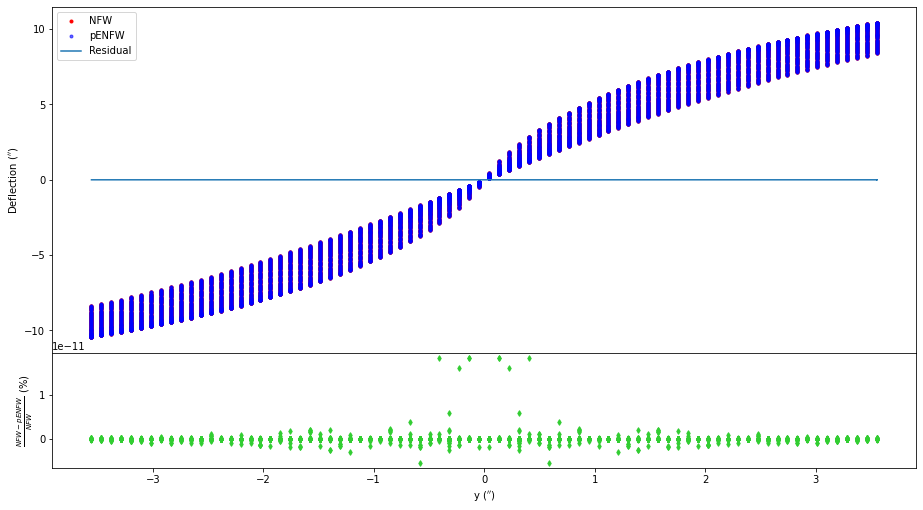

In [11]:
#PLOT
fig1 = plt.figure(figsize=(15,8))

#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
#xstart, ystart, xend, yend [units are fraction of the image frame, from bottom left corner]
plt.plot(grid[:,0],result_sNFW[:,0], ".r", label="NFW")
plt.plot(grid[:,0],result_pENFW[:,0], ".b", label="pENFW", alpha=0.6)
plt.plot(grid[:,0],(result_sNFW[:,0]-result_pENFW[:,0])/result_sNFW[:,0], label="Residual")

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.ylabel("Deflection ($''$)")
plt.legend()


#Residual plot
frame2 = fig1.add_axes((.1,.1,.8,.2))        
plt.plot(grid[:,0],100*(result_sNFW[:,0]-result_pENFW[:,0])/result_sNFW[:,0],'d',
                 color='LimeGreen', mec='LimeGreen', ms=4)

plt.xlabel("y ($''$)")
plt.ylabel("$\\frac{NFW - pENFW}{NFW}$ (%)")

Text(0, 0.5, '$\\frac{NFW - pENFW}{NFW}$ (%)')

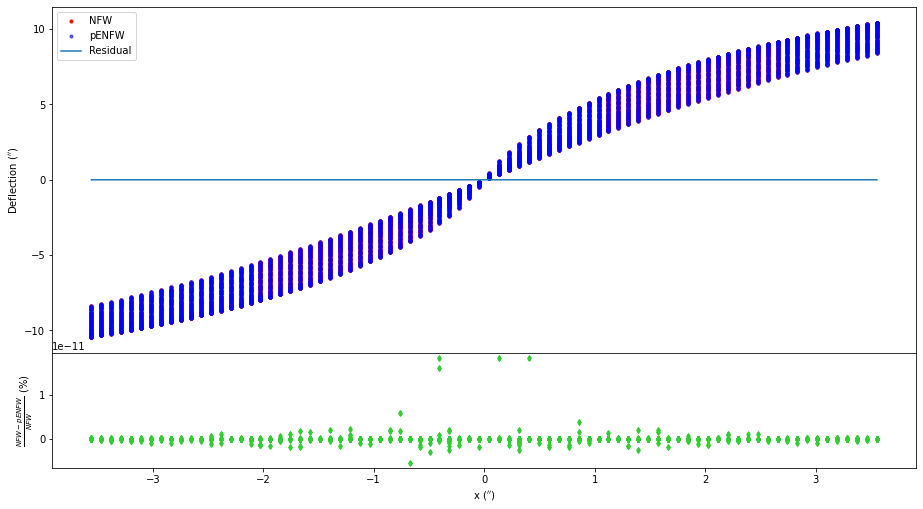

In [10]:
#PLOT
fig1 = plt.figure(figsize=(15,8))

#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
#xstart, ystart, xend, yend [units are fraction of the image frame, from bottom left corner]
plt.plot(grid[:,1],result_sNFW[:,1], ".r", label="NFW")
plt.plot(grid[:,1],result_pENFW[:,1], ".b", label="pENFW", alpha=0.6)
plt.plot(grid[:,1],(result_sNFW[:,1]-result_pENFW[:,1])/result_sNFW[:,1], label="Residual")

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.ylabel("Deflection ($''$)")
plt.legend()


#Residual plot
frame2 = fig1.add_axes((.1,.1,.8,.2))        
plt.plot(grid[:,1],100*(result_sNFW[:,1]-result_pENFW[:,1])/result_sNFW[:,1],'d',
                 color='LimeGreen', mec='LimeGreen', ms=4)

plt.xlabel("x ($''$)")
plt.ylabel("$\\frac{NFW - pENFW}{NFW}$ (%)")